Лабораторная 1

In [12]:
import numpy as np
import pandas as pd

def is_integer(x):
    return str(x)[-2:] != '.0' and str(x)[-1] != '.'

print()

def print_matrix(mat):
  st = ""

  for row in mat:
    for x in row:
      vr_elem = ""
      if str(x)[-2:] == '.0':
        vr_elem = str(x)[:-2]
      elif str(x)[-1] == '.':
        vr_elem += str(x)[:-1]
      else:
        vr_elem += str(x)
      st += f"{vr_elem:>6} "
    st += "\n"

  return st


my_array = np.arange(10, 70, 2)
print("Пункт 1:\n" + " ".join(str(x) for x in my_array) + "\n")

A = my_array.reshape(6, 5)
A = A.T
print("Пункт 2:\n" + print_matrix(A), "\n")

A = A * 2.5
A[0] -= 5
print("Пункт 3:\n" + print_matrix(A), "\n")

rand_array = np.random.randint(0, 11, size=18)
B = rand_array.reshape(6, 3)
print("Пункт 4:\n" + print_matrix(B), "\n")

a = np.sum(A, axis=1) # потому что матрица транспонированная
b = np.sum(B, axis=0)
print("Пункт 5:\n" + f"a: {" ".join(str(x)[:-2] for x in a)}, len(a): {len(a)};\n" + f"b: {" ".join(str(x) for x in b)}, len(b): {len(b)}", "\n")

Dot = np.dot(A, B)
print("Пункт 6:\n" + print_matrix(Dot), "\n")

A = np.delete(A, 2, axis=1)
B = np.hstack((B, np.random.randint(0, 11, size=(6, 3))))
print("Пункт 7:\n" + print_matrix(A), "\n\n" + print_matrix(B), "\n")

Det_A = np.linalg.det(A)
Det_B = np.linalg.det(B)
print("Пункт 8:\n")
if Det_A: print(f"det(A): {Det_A}\nObr_A:\n{print_matrix(np.linalg.inv(A))}\n")
else: print("det(A): 0\n")
if Det_B: print(f"det(B): {Det_B}\nObr_B:\n{print_matrix(np.linalg.inv(B))}\n")
else: print("det(B): 0\n")

A = np.linalg.matrix_power(A, 6)
B = np.linalg.matrix_power(B, 14)
print("Пункт 9:\nA:\n" + print_matrix(A), "\n\nB:\n" + print_matrix(B), "\n")

Lin_uravn = np.array([[2, -5, 1, 0], [1, -1, -13, 0], [3, -2, -2, -4], [4, 0, 2.7, -1.3]])
mas_b = np.array([-4, 2.6, 1, -2])
print("Пункт 10:\n" + " ".join(str(x) for x in np.linalg.solve(Lin_uravn, mas_b)), "\n")

SyntaxError: f-string: expecting '}' (1718210911.py, line 44)

Лабораторная 2

In [116]:
import numpy as np
import pandas as pd
from scipy.misc import derivative
import sympy as sp
from scipy.optimize import minimize


def f(x): # первая функция
    return 0.5 * np.log(x)

def rectangle_method(f, a, b, N): # метод прямоугольников
    dx = (b - a) / N
    result = 0
    for i in range(N):
        xi = a + (i + 0.5) * dx
        result += f(xi) * dx
    return result

def objective(vars): # целевая функция
    x1, x2 = vars
    return (x1 - 3)**2 + (x2 - 1)**2
def constraint1(vars): # первое ограничение
    x1, x2 = vars
    return -2*x1 + x2 - 2
def constraint2(vars): # второе ограничение
    x1, x2 = vars
    return x2 - 10/3


first_p = derivative(f, 2, dx=1e-6)
second_p = derivative(f, 2, dx=1e-6, n=2)
print(f"Пункт 1:\nПервая производная: {first_p}\nВторая производная: {second_p}\n")

sym_x = sp.Symbol('x')
print("Пункт 2:\nПервая производная f'(x):")
sp.pprint(sp.diff(0.5 * sp.log(sym_x), sym_x))
print("\nВторая производная f''(x):")
sp.pprint(sp.diff(0.5 * sp.log(sym_x), sym_x, 2))
print()

print("Пункт 3:\n" + str(rectangle_method(f, 1, 6, 100000)) + "\n")

print("Пункт 4:")
sp.pprint(sp.integrate(0.5 * sp.log(sym_x), sym_x))
print()

bounds = [(0, None), (0, None)] # ограничения для каждой переменной
# Определения для каждой переменной
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
x0 = np.array([0.5, 0.5]) # начальное приближение
result = minimize(objective, x0, bounds=bounds, constraints=[con1, con2]) # запуск оптимизации
print("Пункт 5:")
print(f"Минимум функции находится в точке ({" ".join(str(i) for i in result.x)}) и равен {result.fun}\n\n")
print(result)

Пункт 1:
Первая производная: 0.2500000000071889
Вторая производная: -0.12495560142156137

Пункт 2:
Первая производная f'(x):
0.5
───
 x 

Вторая производная f''(x):
-0.5 
─────
  2  
 x   

Пункт 3:
2.8752784077275555

Пункт 4:
0.5⋅x⋅log(x) - 0.5⋅x

Пункт 5:
Минимум функции находится в точке (0.6666666666666368 3.3333333333333455) и равен 10.888888888889085


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 10.888888888889085
       x: [ 6.667e-01  3.333e+00]
     nit: 3
     jac: [-4.667e+00  4.667e+00]
    nfev: 10
    njev: 3


C:\Users\csr10\AppData\Local\Temp\ipykernel_10460\2043958258.py:30: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  first_p = derivative(f, 2, dx=1e-6)
C:\Users\csr10\AppData\Local\Temp\ipykernel_10460\2043958258.py:31: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  second_p = derivative(f, 2, dx=1e-6, n=2)


Лабораторная 3

In [ ]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy


def calculate_statistics(sample):
    print("Среднее:", np.mean(sample)) # среднее - понятно
    print("Мода:", scipy.stats.mode(sample)) # мода - наиболее часто встречающееся значение
    print("Медиана:", np.median(sample)) # для нечётного числа элементов медиана - среднее, для чётного - среднее двух средних(от левой и правой частей)
    print("Минимум:", np.min(sample)) # это тоже понятно
    print("Максимум:", np.max(sample)) # это тоже понятно
    print("Стандартное отклонение:", np.std(sample)) # мера того, насколько отличаются от среднего значения элементы списка(если большое, то элементы значительно отличаются от среднего)


# пункт 1
matrix = np.array([[2, -5, 1, 0, -4], [1, -1, -13, 0, 2.6], [3, -2, -2, -4, 1], [4, 0, 2.7, -1.3, -2]])

#пункт 2
P, L, U = scipy.linalg.lu(matrix)
print("Пункт 1:\n" + print_matrix(matrix))
print("Пункт 2:")
print("Матрица P (перестановочная матрица):\n" + print_matrix(P))
print("Матрица L (нижнетреугольная матрица):\n" + print_matrix(L))
print("Матрица U (верхнетреугольная матрица):\n" + print_matrix(U))

# пункт 3
det_L = np.prod(np.diag(L)) # произведения элементов на главной диагонали и определитель P 
det_U = np.prod(np.diag(U))
det_P = np.linalg.det(P)
# Определитель матрицы A
det_A = det_P * det_L * det_U
print("Пункт 3:")
print("Определитель L:", det_L)
print("Определитель U:", det_U)
print("Определитель P:", det_P)
print("Определитель A:", det_A)

# пункт 4
uniform_sample = np.random.randint(0, 101, size=100) # первая выборка: равномерное распределение
mean, std_dev = 50, 15  # среднее и стандартное отклонение для нормального распределения
normal_sample = np.random.normal(mean, std_dev, 100) # вторая выборка: нормальное распределение (округление до целого)
print("\nПункт 4:")
print("Первая выборка:\n" + str(uniform_sample)[1:-1] + "\n\nВторая выборка:\n" + str(normal_sample)[1:-1] + "\n")
# равномерное распределение - вероятность каждого исхода одинакова, то есть частота элементов примерно равна
# нормальное распределение - распределение колоколообразной формы, где значения ближе к среднему встречаются чаще,
# чем те, что ближе к границам диапазона

# пункт 5
print("Пункт 5:")
print("Статистика для равномерного распределения:")
calculate_statistics(uniform_sample)
print("\nСтатистика для нормального распределения:")
calculate_statistics(normal_sample)
print()

# пункт 6
observed_values, counts = np.unique(normal_sample, return_counts=True) # частоты элементов
expected_counts = np.full_like(counts, np.mean(counts)) # ожидаемые частоты для равномерного распределения
chi2_stat, p_value = scipy.stats.chisquare(counts, f_exp=expected_counts) # применяем критерий хи-квадрат
print("Пункт 6:")
print("p-значение: " + str(p_value))
# хи-квадрат: сумма квадратов разностей наблюдаемых и ожидаемых частот делить на ожидаемую частоту
# p-значение показывает вероятность того, что результаты исследования могут быть получены случайно, если нулевая гипотеза верна

Пункт 1:
     2     -5      1      0     -4 
     1     -1    -13      0    2.6 
     3     -2     -2     -4      1 
     4      0    2.7   -1.3     -2 

Пункт 2:
Матрица P (перестановочная матрица):
     0      1      0      0 
     0      0      1      0 
     0      0      0      1 
     1      0      0      0 

Матрица L (нижнетреугольная матрица):
     1      0      0      0 
   0.5      1      0      0 
  0.25    0.2      1      0 
  0.75    0.4 0.2855567805953693      1 

Матрица U (верхнетреугольная матрица):
     4      0    2.7   -1.3     -2 
     0     -5 -0.3500000000000001   0.65     -3 
     0      0 -13.605  0.195    3.7 
     0      0      0 -3.340683572216097 2.6434399117971337 

Пункт 3:
Определитель L: 1.0
Определитель U: -909.0000000000001
Определитель P: -1.0
Определитель A: 909.0000000000001

Пункт 4:
Первая выборка:
 77  89  57  50  47  20  58  96  26  10  11  72  58  45  49  29  75  14
  28  99  79  63  92  53  15   6  45   7  46  61  98  65  74  47  71  80
  60

Лабораторная 4

Пункт 1:
0.0 0.024635524503391418 0.04811401604727688 0.0705392991299528 0.09200182148846972 0.1125808577352235 0.13234627711354108 0.15135997490816075 0.1696770414980509 0.18734672472070535 0.20441322790543465 0.22091637613951962 0.23689217604282076 0.25237328884480426 0.2673894323942418 0.28196772453996954 0.2961329778530825 0.3099079537371978 0.32331358246252623 0.3363691544643691 0.3490924872949513 0.3615000718548132 0.37360720091511057 0.3854280824436308 0.3969759398409554 0.40826310086022494 0.41930107670982486 0.4301006326115557 0.4406718508984604 0.45102418757930596 0.46116652316505885 0.47110720844197335 0.48085410578247384 0.49041462650586315 0.4997957647336246 0.5090041281267401 0.5180459658433879 0.526927194013308 0.535653418988921 0.5442299586020458 0.5526618616280483 0.5609539256358158 0.5691107133815777 0.5771365678868318 0.5850356263251273 0.5928118328288697 0.6004689503153909 0.6080105714210552 0.6154401286229302 0.6227609036194043 0.6299760360339186 0.6370885314995922

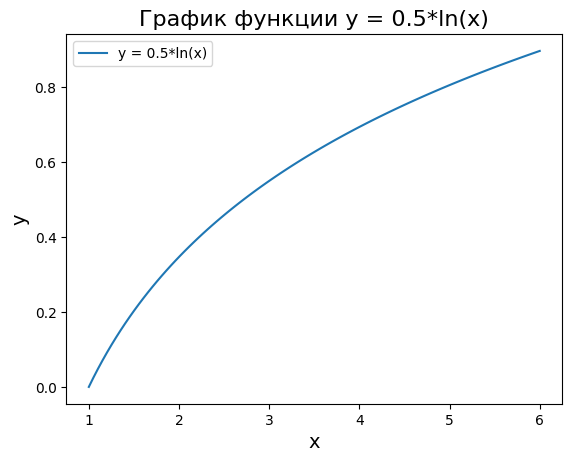


Пункт 3:


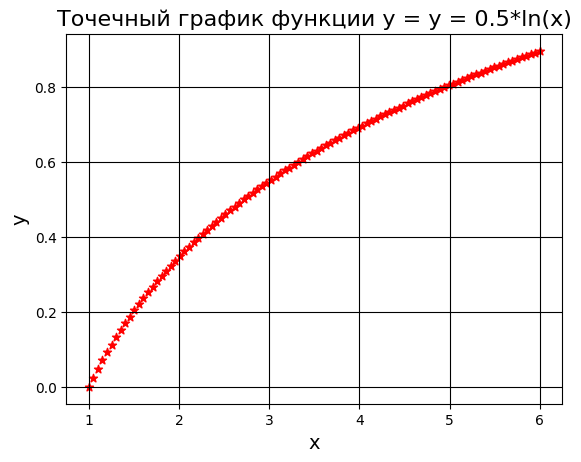


Пункт 4:


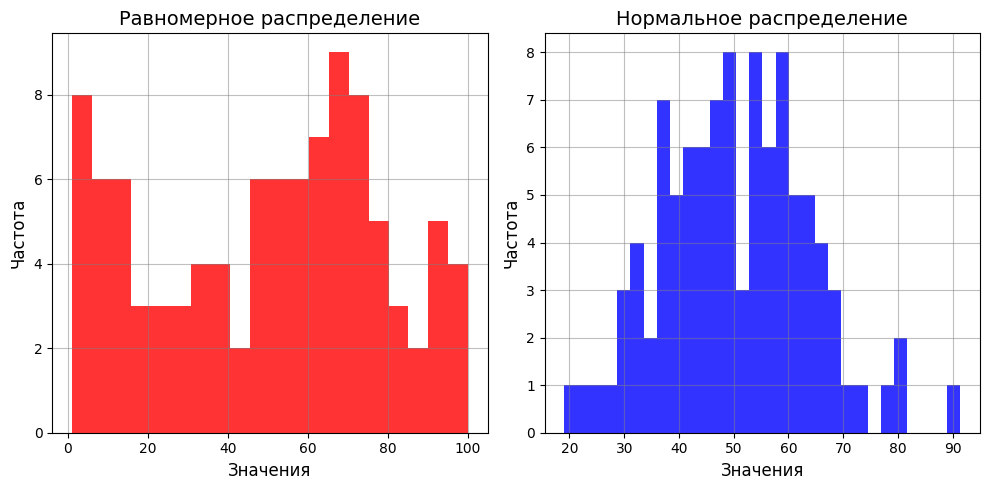


Пункт 5:


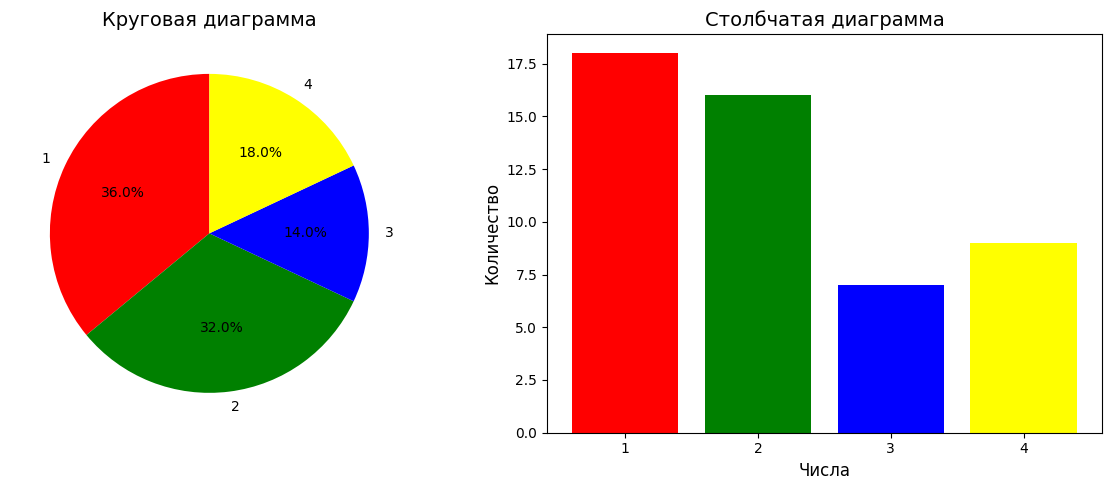


Пункт 6:


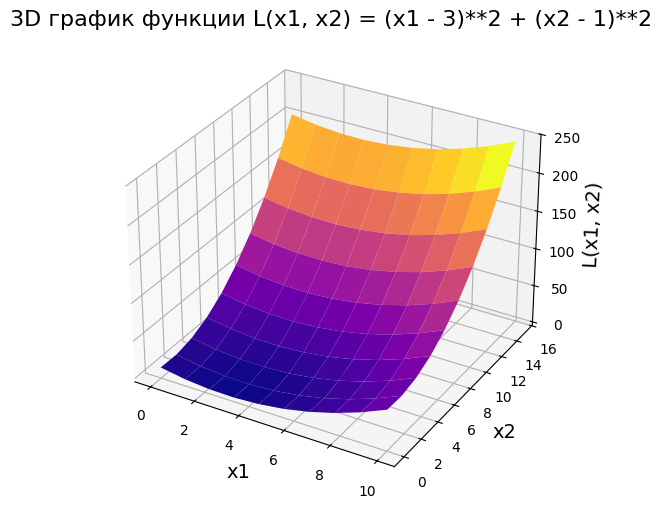


Пункт 7:


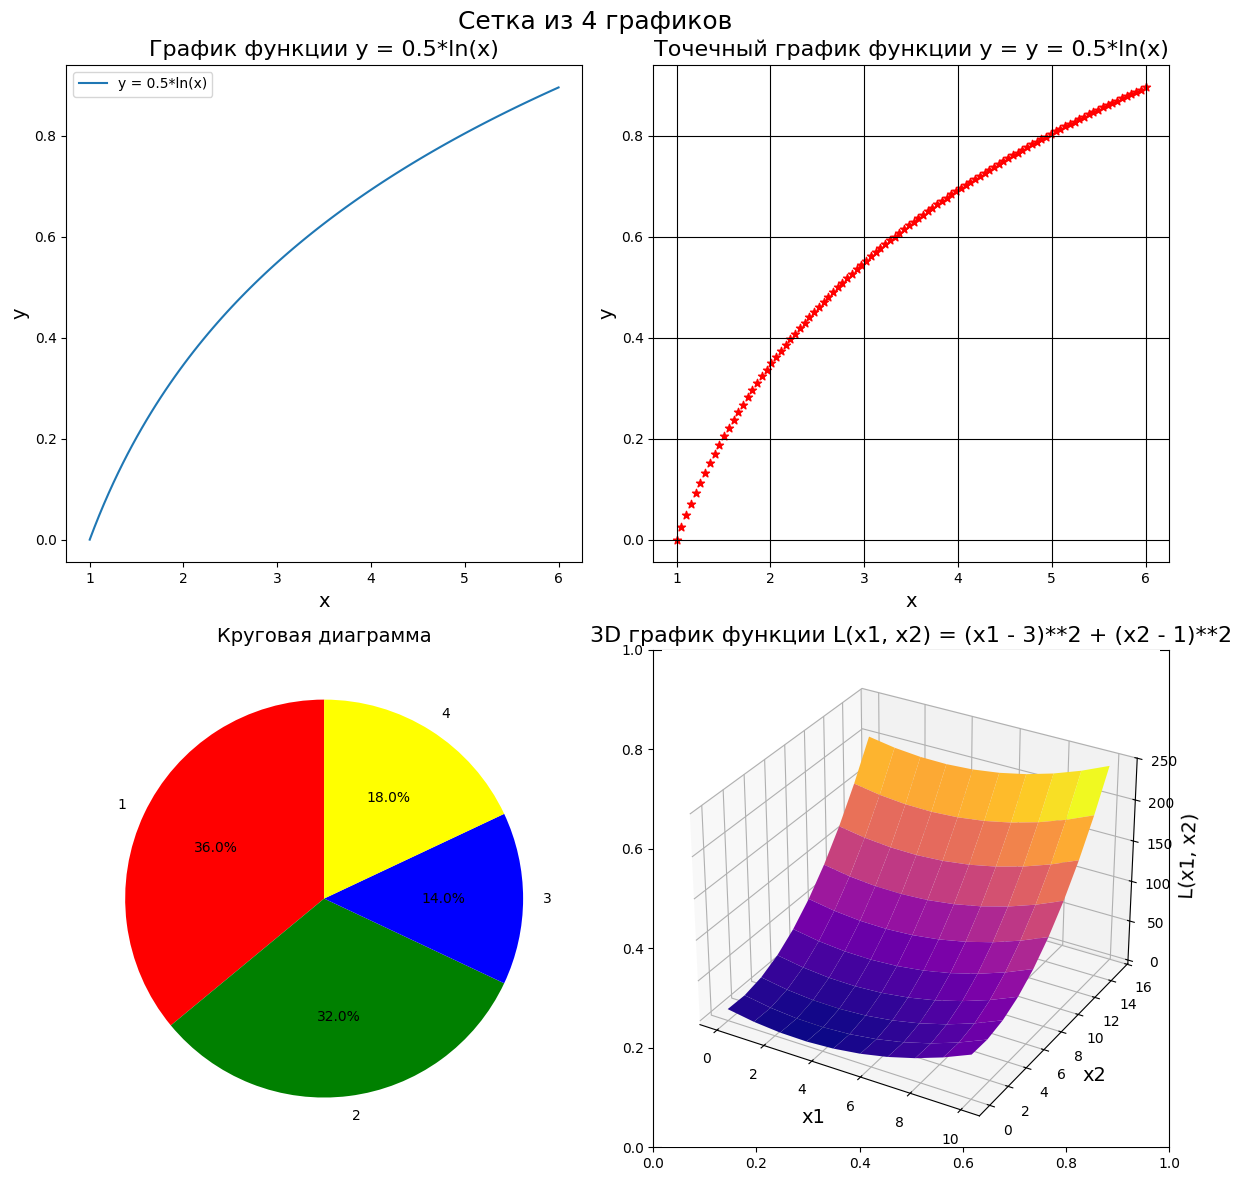


Пункт 8:
default style


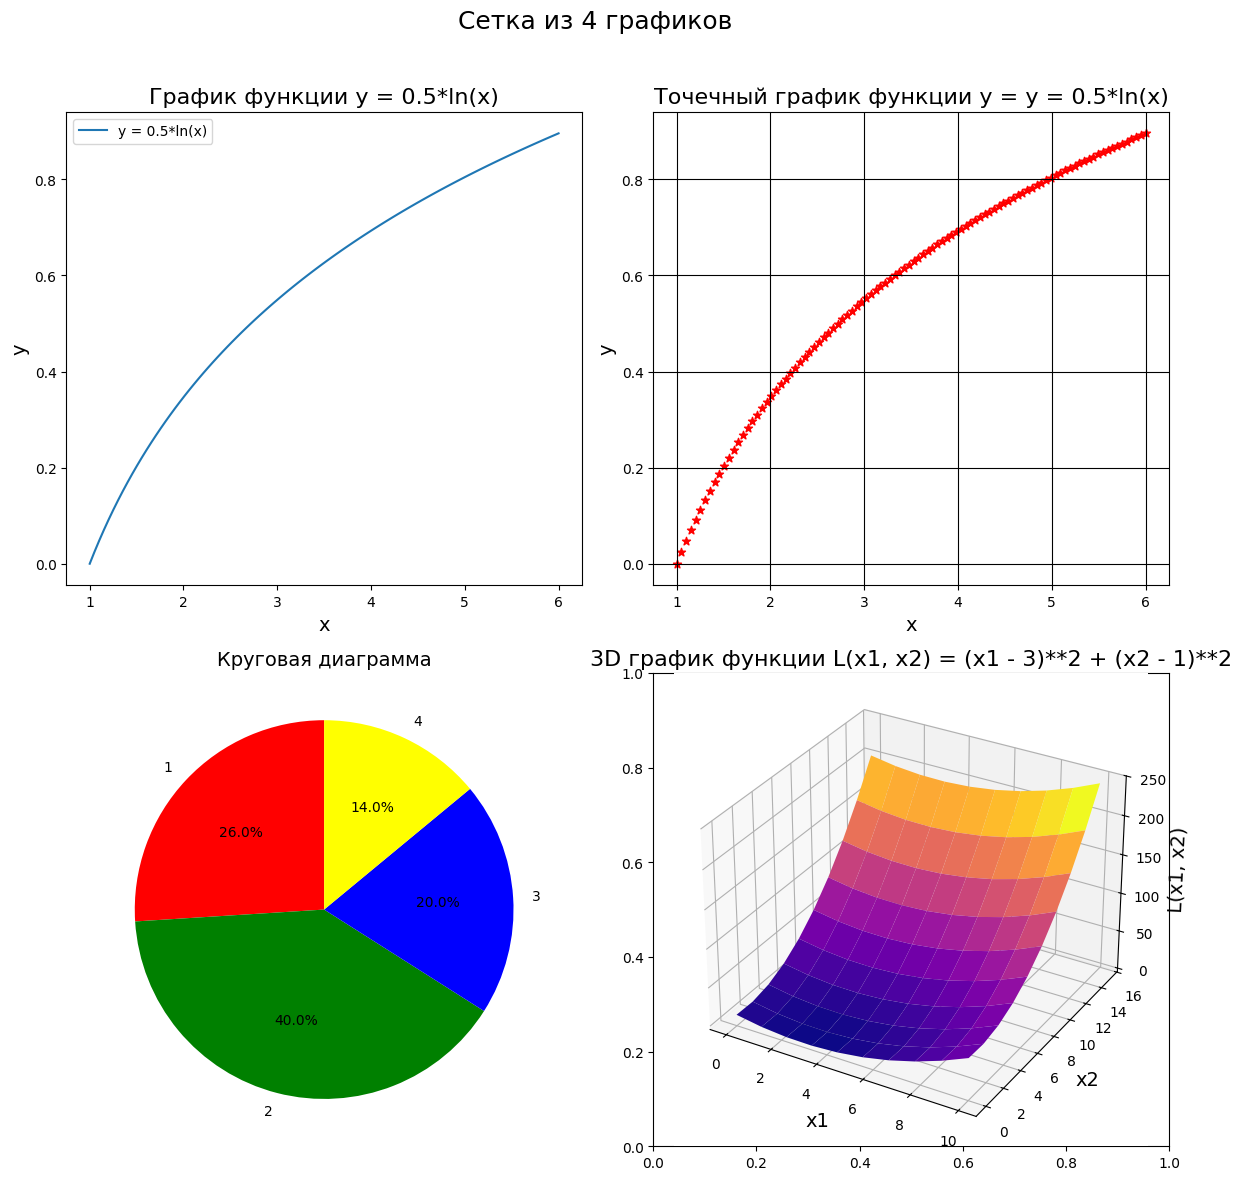

bmh style


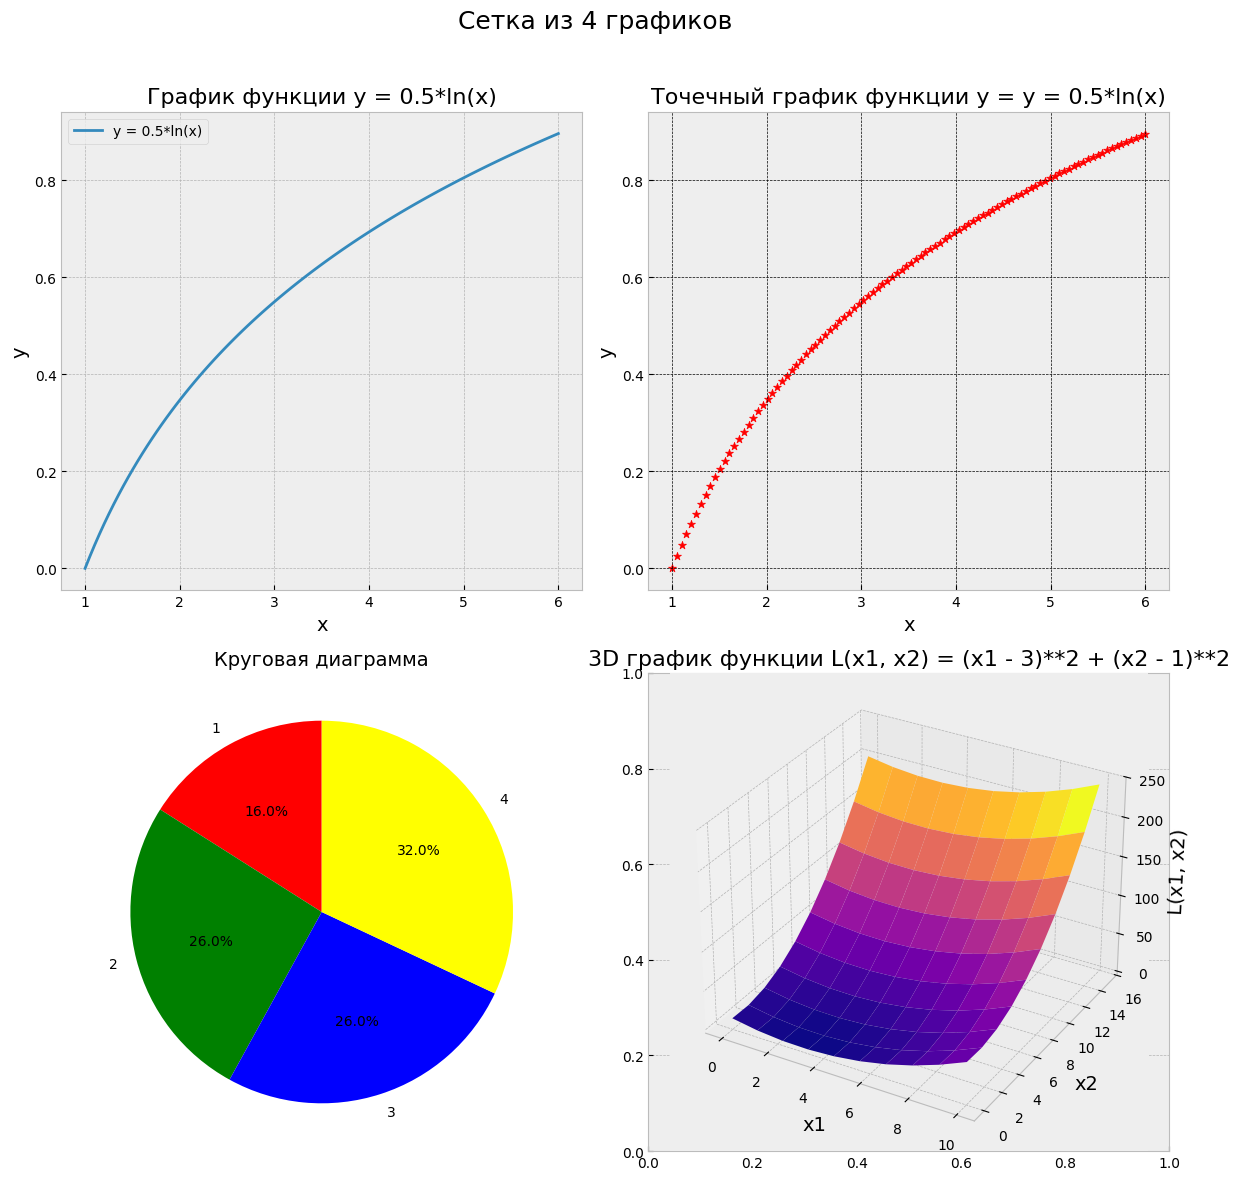

ggplot style


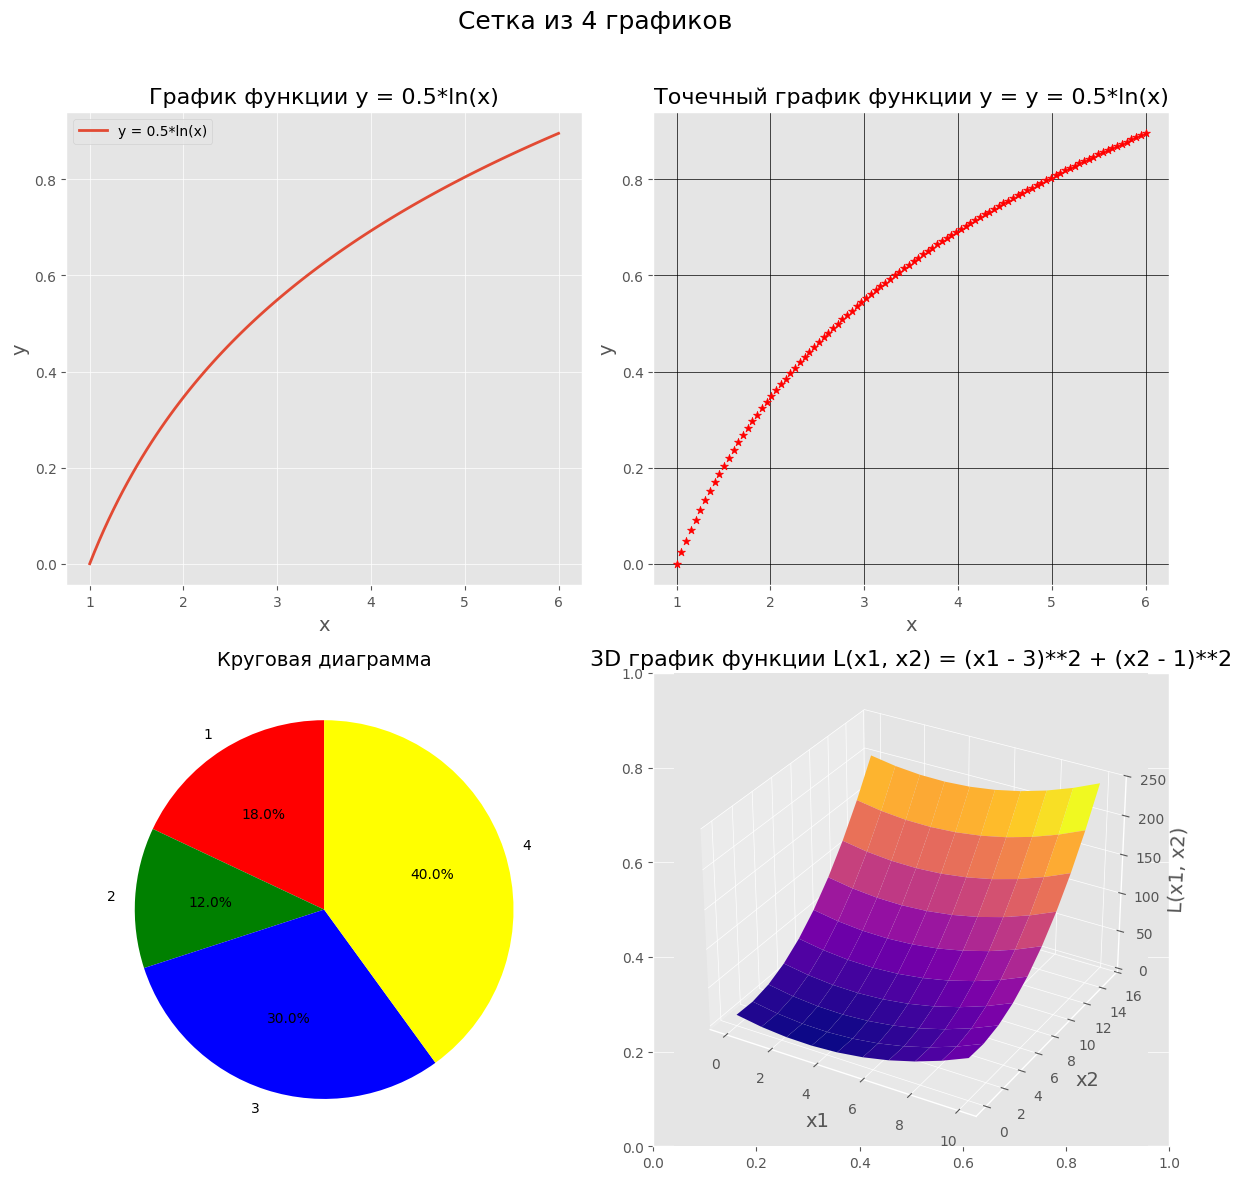

dark_background style


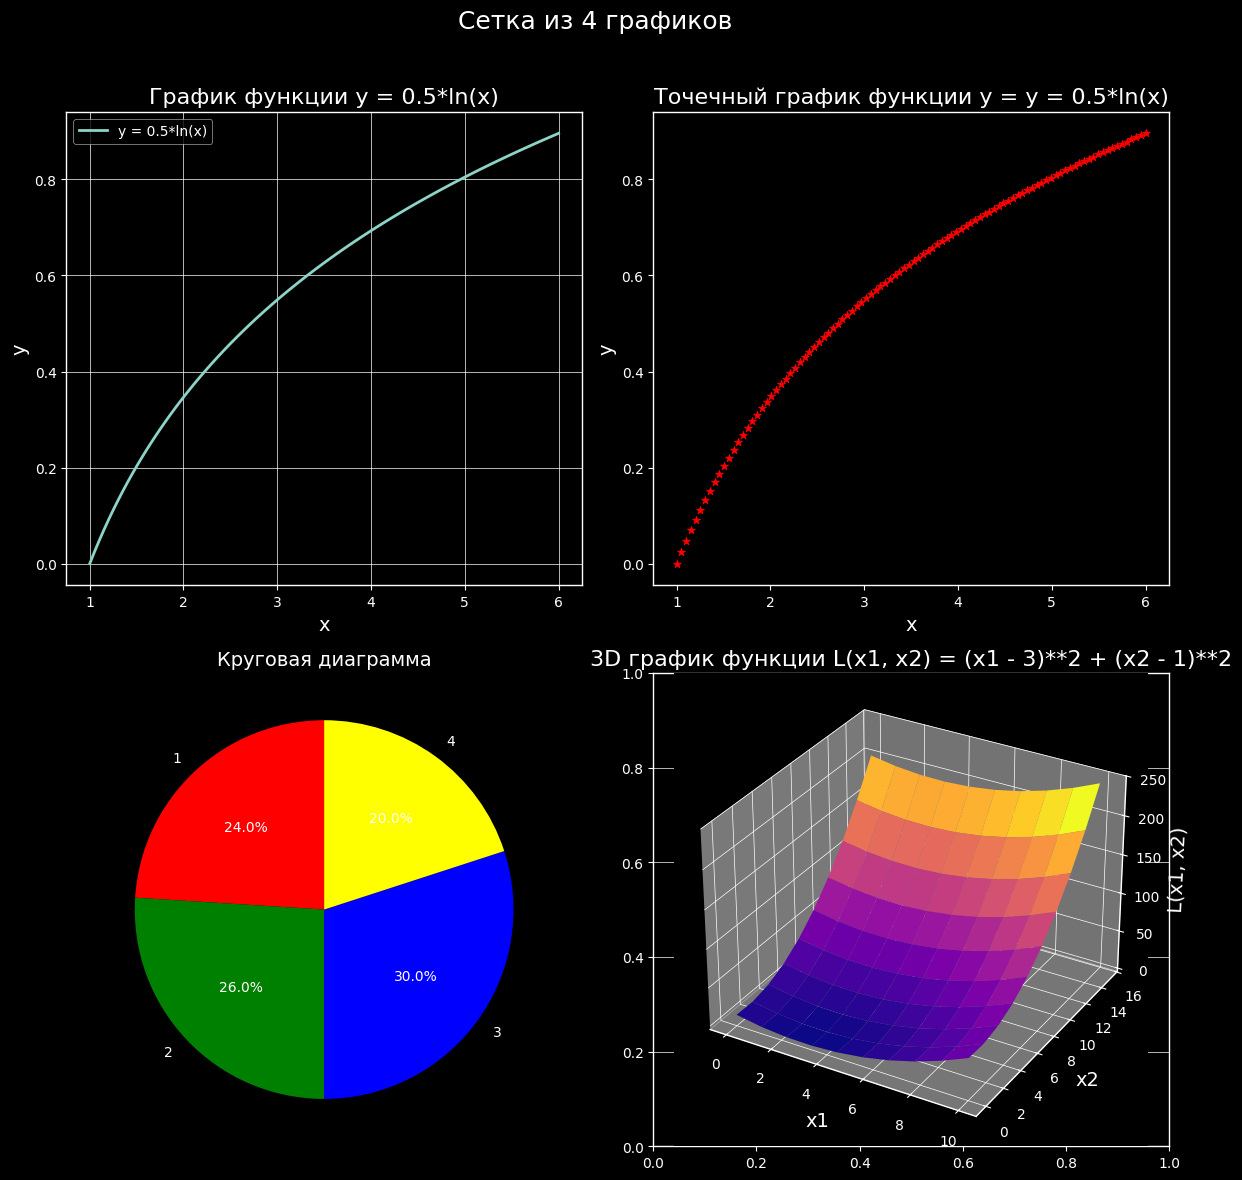

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')


def f(x): # первая функция
    return 0.5 * np.log(x)

def objective(vars): # целевая функция
    x1, x2 = vars
    return (x1 - 3)**2 + (x2 - 1)**2

def plot_grid():
    a = 1
    b = 6
    dots_mas = np.linspace(a, b, 100)
    func_mas = [f(i) for i in dots_mas]
    normal_data_2 = np.random.randint(1, 5, size=50)
    values, counts = np.unique(normal_data_2, return_counts=True)

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle("Сетка из 4 графиков", fontsize=18)

    axs[0, 0].plot(dots_mas, func_mas, label="y = 0.5*ln(x)")
    axs[0, 0].set_title("График функции y = 0.5*ln(x)", fontsize=16)
    axs[0, 0].set_xlabel("x", fontsize=14)
    axs[0, 0].set_ylabel("y", fontsize=14)
    axs[0, 0].legend()

    color = (1, 0, 0)
    axs[0, 1].scatter(dots_mas, func_mas, color=color, marker='*', label="y = 0.5*ln(x)")
    axs[0, 1].set_title("Точечный график функции y = y = 0.5*ln(x)", fontsize=16)
    axs[0, 1].set_xlabel("x", fontsize=14)
    axs[0, 1].set_ylabel("y", fontsize=14)
    axs[0, 1].grid(True, color='black', alpha=1)

    colors = ['red', 'green', 'blue', 'yellow']
    axs[1, 0].pie(counts, labels=values, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[1, 0].set_title("Круговая диаграмма", fontsize=14)

    ax = fig.add_subplot(2, 2, 4, projection='3d')
    ax.plot_surface(X1, X2, L, cmap='plasma')
    ax.set_title("3D график функции L(x1, x2) = (x1 - 3)**2 + (x2 - 1)**2", fontsize=16)
    ax.set_xlabel("x1", fontsize=14)
    ax.set_ylabel("x2", fontsize=14)
    ax.set_zlabel("L(x1, x2)", fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# пункт 1
a = 1
b = 6
dots_mas = np.linspace(a, b, 100) # 100 элементов в диапазоне [a, b] с равным шагом
func_mas = [f(i) for i in dots_mas]
print("Пункт 1:")
print(*func_mas)
print()

# пункт 2
plt.plot(dots_mas, func_mas, label="y = 0.5*ln(x)") # label для легенды
plt.title("График функции y = 0.5*ln(x)", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
print("Пункт 2:")
plt.show()
print()

# пункт 3
color = (1, 0, 0)
plt.scatter(dots_mas, func_mas, color=color, marker='*', label="y = 0.5*ln(x)") # точечный график
plt.title("Точечный график функции y = y = 0.5*ln(x)", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid(True, color='black', alpha=1) # сетка: True - отображать, alpha - прозрачность
print("Пункт 3:")
plt.show()
print()

# пункт 4
uniform_data = np.random.randint(0, 101, size=100)
mean, std_dev = 50, 15
normal_data = np.random.normal(mean, std_dev, 100)
plt.figure(figsize=(10, 5)) # создание поля для размещения 10:5
plt.subplot(1, 2, 1) # сетка 1:2 и индекс графика 1
plt.hist(uniform_data, bins=20, color='red', alpha=0.8) # bins - на сколько столбцов делить
plt.title("Равномерное распределение", fontsize=14)
plt.xlabel("Значения", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(True, color='gray', alpha=0.5)
plt.subplot(1, 2, 2)
plt.hist(normal_data, bins=30, color='blue', alpha=0.8)
plt.title("Нормальное распределение", fontsize=14)
plt.xlabel("Значения", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(True, color='gray', alpha=0.5)
print("Пункт 4:")
plt.tight_layout() # автоматически настраивает подграфики чтобы они не перекрывались и не выходили за границы фигуры
plt.show()
print()

# пункт 5
normal_data_2 = np.random.randint(1, 5, size=50)
values, counts = np.unique(normal_data_2, return_counts=True)
colors = ['red', 'green', 'blue', 'yellow']
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(counts, labels=values, colors=colors, autopct='%1.1f%%', startangle=90) # autopct - формат процентов, startangle - стартовый угол
plt.title("Круговая диаграмма", fontsize=14)
plt.subplot(1, 2, 2)
plt.bar(values, counts, color=colors)
plt.title("Столбчатая диаграмма", fontsize=14)
plt.xlabel("Числа", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.xticks(values) # какие должны быть метки по оси Ox
print("Пункт 5:")
plt.tight_layout()
plt.show()
print()

# пункт 6
x1_values = np.linspace(0, 10, 10)
x2_values = np.linspace(0, 15, 10)
X1, X2 = np.meshgrid(x1_values, x2_values) # используется для создания сетки координат из одномерных массивов, возвращает два двумерных массива, представляющих координаты x и y для каждой точки сетки.
L = objective([X1, X2])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') # добавить график
ax.plot_surface(X1, X2, L, cmap='plasma') # оси и цветовая карта
ax.set_title("3D график функции L(x1, x2) = (x1 - 3)**2 + (x2 - 1)**2", fontsize=16)
ax.set_xlabel("x1", fontsize=14)
ax.set_ylabel("x2", fontsize=14)
ax.set_zlabel("L(x1, x2)", fontsize=14)
print("Пункт 6:")
plt.show()
print()

# пункт 7
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Сетка из 4 графиков", fontsize=18)

axs[0, 0].plot(dots_mas, func_mas, label="y = 0.5*ln(x)")
axs[0, 0].set_title("График функции y = 0.5*ln(x)", fontsize=16)
axs[0, 0].set_xlabel("x", fontsize=14)
axs[0, 0].set_ylabel("y", fontsize=14)
axs[0, 0].legend()

color = (1, 0, 0)
axs[0, 1].scatter(dots_mas, func_mas, color=color, marker='*', label="y = 0.5*ln(x)")
axs[0, 1].set_title("Точечный график функции y = y = 0.5*ln(x)", fontsize=16)
axs[0, 1].set_xlabel("x", fontsize=14)
axs[0, 1].set_ylabel("y", fontsize=14)
axs[0, 1].grid(True, color='black', alpha=1)

colors = ['red', 'green', 'blue', 'yellow']
axs[1, 0].pie(counts, labels=values, colors=colors, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title("Круговая диаграмма", fontsize=14)

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.plot_surface(X1, X2, L, cmap='plasma')
ax.set_title("3D график функции L(x1, x2) = (x1 - 3)**2 + (x2 - 1)**2", fontsize=16)
ax.set_xlabel("x1", fontsize=14)
ax.set_ylabel("x2", fontsize=14)
ax.set_zlabel("L(x1, x2)", fontsize=14)

print("Пункт 7:")
plt.tight_layout()
plt.show()
print()

# пункт 8
print("Пункт 8:")
print('default style')
plot_grid()
plt.style.use('bmh')
print('bmh style')
plot_grid()
plt.style.use('ggplot')
print('ggplot style')
plot_grid()
plt.style.use('dark_background')
print('dark_background style')
plot_grid()

Лабораторная 5

In [6]:
import numpy as np
import pandas as pd
from IPython.display import display

# пункт 1
df = pd.DataFrame({"Name": pd.Series(['Strom, Mrs. Wilhelm (Elna Matilda Persson)', 'Navratil, Mr. Michel ("Louis M Hoffman")', 'Minahan, Miss. Daisy E']), 
                   "Age": pd.Series([29, 36.5, 33]), 
                   "Sex": pd.Series(['female', 'male', 'female'])})
print("Пункт 1:")
display(df)

# пункт 2
df1 = pd.read_csv("titanic_csv.csv", sep=";")
print("Пункт 2:")
display(df1)

# пункт 3
df2 = pd.read_csv("https://gist.githubusercontent.com/zaryanezrya/8b4ef51c707cb16d5e88a44dc00a1bb2/raw/41230f49c6268e072dbf102672f670be256922ab/gistfile1.txt", sep=",")
print("Пункт 3:")
display(df2)

# пункт 4
df2 = df2.rename(columns=lambda x: x[0].upper() + x[1:])
df2 = df2.rename(columns={"Passengerid" : "PassengerId", "Sibsp" : "SibSp"})
df3 = pd.concat([df1, df2], ignore_index=True).drop_duplicates(keep='last')
print("Пункт 4:")
display(df3)

Пункт 1:


,Name,Age,Sex
0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",29.0,female
1,"Navratil, Mr. Michel (""Louis M Hoffman"")",36.5,male
2,"Minahan, Miss. Daisy E",33.0,female


Пункт 2:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
1,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
2,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
3,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
4,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
489,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C
490,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
491,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
492,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S


Пункт 3:


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
1,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S
2,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
3,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
4,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
495,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
496,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
497,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
498,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C


Пункт 4:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
1,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
3,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
5,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
6,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
989,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
990,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
991,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
992,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C


In [7]:
# пункт 5
df3 = df3.set_index("PassengerId", drop=True).sort_index()
print("Пункт 5:")
display(df3)

# пункт 6
print("Пункт 6:")
print(df3.info())
print(df3.describe())
print()

# пункт 7
df3.loc[2], df3.iloc[0] = df3.iloc[0], df3.loc[2]  # получить строки с индексами 0 и 2 и поменять местами
print("Пункт 7:")
display(df3)

Пункт 5:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Пункт 6:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
# пункт 8
df3['Sex'] = df3['Sex'].map({'female': 'f', 'male': 'm'})
print("Пункт 8:")
display(df3)

# пункт 9
vr_df = df3.groupby("Ticket").count() > 5
vr_ser = vr_df[vr_df['Name'] == True]['Name'].index.values
df4 = df3[df3['Ticket'].isin(vr_ser)].sort_values(by='Ticket')
print("Пункт 9:")
display(df4)

# пункт 10
vr_pd = df3[df3['Name'].isin(df['Name'])]
vr_ser = vr_pd['Cabin']
df5 = df3[df3['Cabin'].isin(vr_ser) & ~df3['Name'].isin(df['Name'])]
print("Пункт 10:")
display(df5)

Пункт 8:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C
2,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S


Пункт 9:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
510,1,3,"Lang, Mr. Fang",m,26.0,0,0,1601,56.4958,NaN,S
839,1,3,"Chip, Mr. Chang",m,32.0,0,0,1601,56.4958,NaN,S
827,0,3,"Lam, Mr. Len",m,NaN,0,0,1601,56.4958,NaN,S
75,1,3,"Bing, Mr. Lee",m,32.0,0,0,1601,56.4958,NaN,S
644,1,3,"Foo, Mr. Choong",m,NaN,0,0,1601,56.4958,NaN,S
693,1,3,"Lam, Mr. Ali",m,NaN,0,0,1601,56.4958,NaN,S
170,0,3,"Ling, Mr. Lee",m,28.0,0,0,1601,56.4958,NaN,S
267,0,3,"Panula, Mr. Ernesti Arvid",m,16.0,4,1,3101295,39.6875,NaN,S
639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",f,41.0,0,5,3101295,39.6875,NaN,S


Пункт 10:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
11,1,3,"Sandstrom, Miss. Marguerite Rut",f,4.0,1,1,PP 9549,16.7000,G6,S
194,1,2,"Navratil, Master. Michel M",m,3.0,1,1,230080,26.0000,F2,S
206,0,3,"Strom, Miss. Telma Matilda",f,2.0,0,1,347054,10.4625,G6,S
246,0,1,"Minahan, Dr. William Edward",m,44.0,2,0,19928,90.0000,C78,Q
341,1,2,"Navratil, Master. Edmond Roger",m,2.0,1,1,230080,26.0000,F2,S
395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",f,24.0,0,2,PP 9549,16.7000,G6,S


In [9]:
# пункт 11
df3['BirthYear'] = df3['Age'].map(lambda x: 1920 - x)
print("Пункт 11:")
display(df3)

# пункт 12
df3['Companion'] = df3.groupby('Cabin')['Cabin'].transform('count')
df3['Companion'] = df3['Companion'].map(lambda x: x - 1) # группируем по Cabin, выбираем Cabin и даём каждой строчке каждой группы значение count
print("Пункт 12:")
display(df3)

# пункт 13
df3.loc[1], df3.iloc[1] = df3.iloc[1], df3.loc[1] 
print("Пункт 13:")
display(df3)

# пункт 14
df3.to_csv("titanic.csv", index=False, sep=";")

# пункт 15
df6 = df3.sort_values(by='Fare', ascending=False).head(10)
print("Пункт 15:")
display(df6)

# пункт 16
mdf = df3[(df3['Sex'] == 'm') & (df3['Survived'] == 1)].shape[0] # shape[0] возвращает количество строк
fdf = df3[(df3['Sex'] == 'f') & (df3['Survived'] == 1)].shape[0]
nmdf = df3[(df3['Sex'] == 'm') & (df3['Survived'] == 0)].shape[0] # shape[0] возвращает количество строк
nfdf = df3[(df3['Sex'] == 'f') & (df3['Survived'] == 0)].shape[0]
print("Пункт 16:")
print("Выжившие мужчины:", mdf)
print("Выжившие женщины:", fdf)
print("Невыжившие мужчины:", nmdf)
print("Невыжившие женщины:", nfdf)

# пункт 17
df7 = df3.groupby('Embarked')['Survived'].value_counts().unstack() # группировка по Embarked, подсчёт записей, создание таблицы с индексами Embarked и столбцами Survived
print("Пункт 17:")
display(df7)

Пункт 11:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BirthYear
PassengerId,,,,,,,,,,,,
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C,1882.0
2,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S,1898.0
3,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1894.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S,1885.0
5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S,1885.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S,1893.0
888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S,1901.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


Пункт 12:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BirthYear,Companion
PassengerId,,,,,,,,,,,,,
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C,1882.0,0.0
2,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S,1898.0,NaN
3,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1894.0,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S,1885.0,1.0
5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S,1885.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S,1893.0,NaN
888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S,1901.0,0.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN


Пункт 13:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BirthYear,Companion
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S,1898.0,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C,1882.0,0.0
3,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1894.0,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S,1885.0,1.0
5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S,1885.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S,1893.0,NaN
888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S,1901.0,0.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN


Пункт 15:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BirthYear,Companion
PassengerId,,,,,,,,,,,,,
738,1,1,"Lesurer, Mr. Gustave J",m,35.0,0,0,PC 17755,512.3292,B101,C,1885.0,0.0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",m,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1884.0,1.0
259,1,1,"Ward, Miss. Anna",f,35.0,0,0,PC 17755,512.3292,NaN,C,1885.0,NaN
439,0,1,"Fortune, Mr. Mark",m,64.0,1,4,19950,263.0000,C23 C25 C27,S,1856.0,3.0
89,1,1,"Fortune, Miss. Mabel Helen",f,23.0,3,2,19950,263.0000,C23 C25 C27,S,1897.0,3.0
28,0,1,"Fortune, Mr. Charles Alexander",m,19.0,3,2,19950,263.0000,C23 C25 C27,S,1901.0,3.0
342,1,1,"Fortune, Miss. Alice Elizabeth",f,24.0,3,2,19950,263.0000,C23 C25 C27,S,1896.0,3.0
312,1,1,"Ryerson, Miss. Emily Borie",f,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1902.0,1.0
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",f,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1899.0,1.0


Пункт 16:
Выжившие мужчины: 109
Выжившие женщины: 233
Невыжившие мужчины: 468
Невыжившие женщины: 81
Пункт 17:


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217
